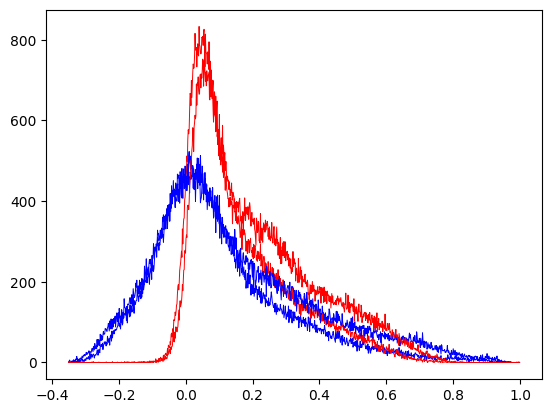

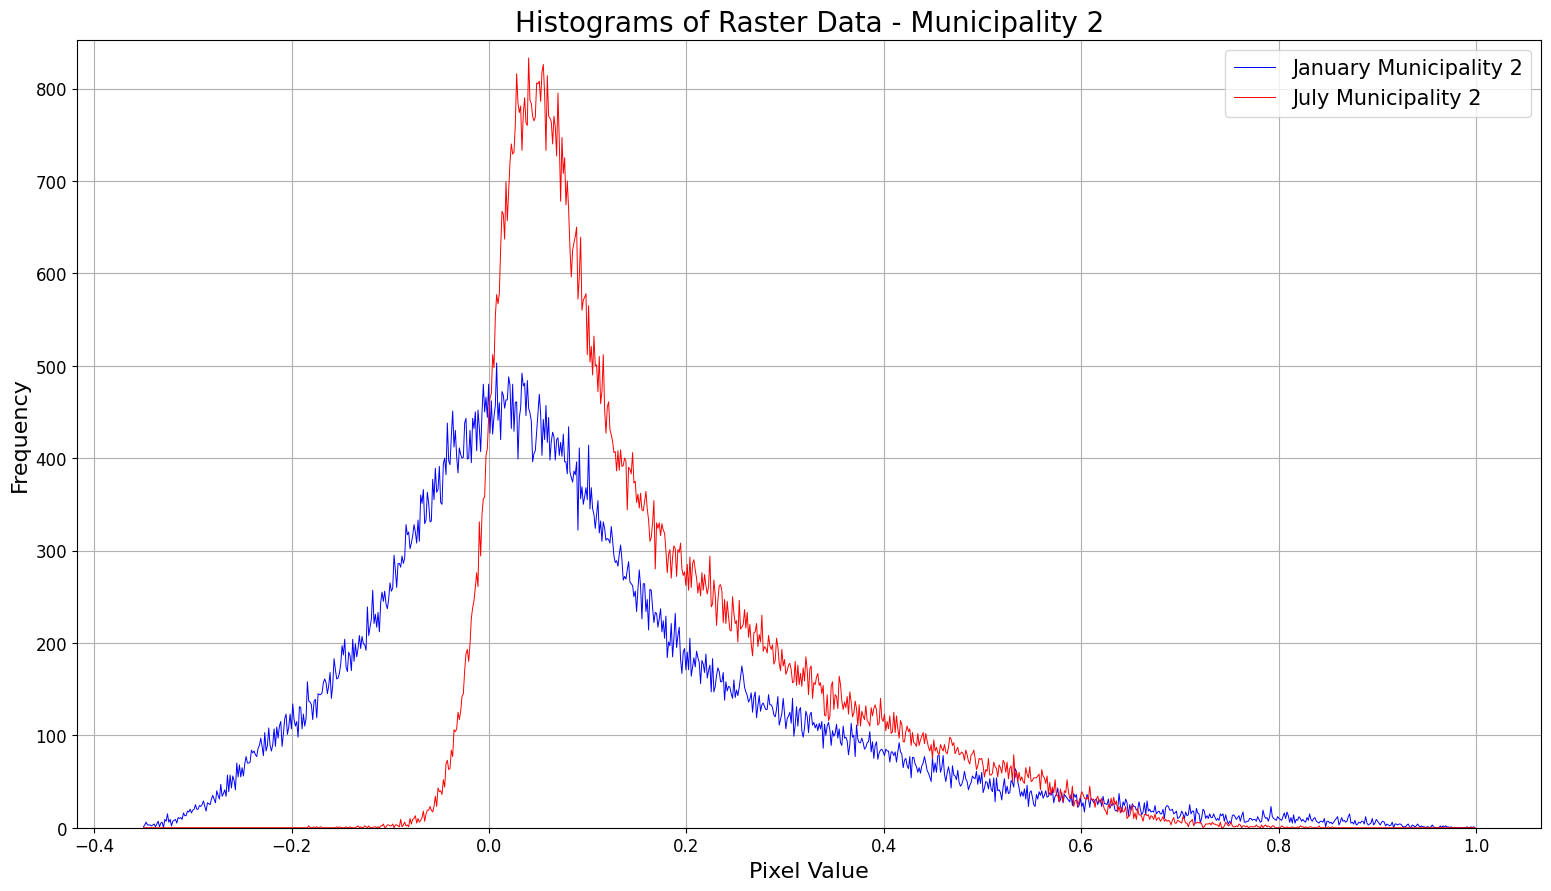

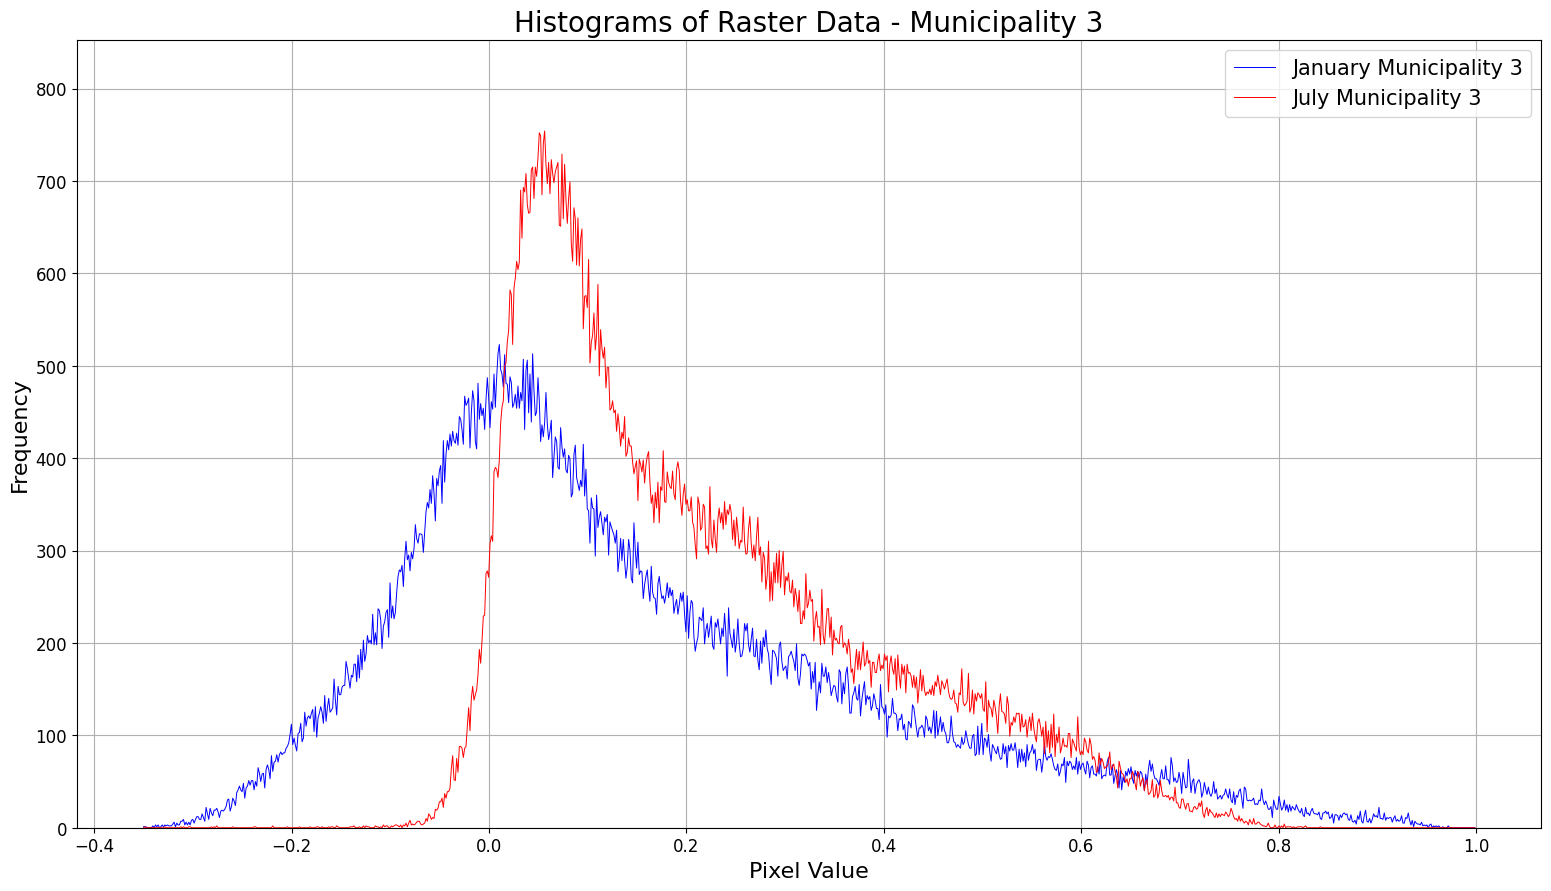

In [50]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Reading the first band
    return data

# Function to remove no-data values and extreme outliers
def clean_raster(data, no_data_value=None):
    if no_data_value is not None:
        data = np.where(data == no_data_value, np.nan, data)
    data = data[np.isfinite(data)]  # Remove NaNs and infinite values
    return data

# Function to plot histograms
def plot_histogram(raster, label, color, bins, linewidth):
    hist, bin_edges = np.histogram(raster, bins=bins, range=(-0.35, 1), density=False)  # Adjust bins and range as needed
    plt.plot(bin_edges[:-1], hist, color=color, label=label, linewidth=linewidth)
    return hist.max()

# Load raster files for Municipality 2
raster1_municipality2 = read_raster(r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_municipi\220116_savi_mun_2_00.tiff')
raster2_municipality2 = read_raster(r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_municipi\220715_savi_mun_2_00.tiff')

# Load raster files for Municipality 3
raster1_municipality3 = read_raster(r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_municipi\220116_savi_mun_3_00.tiff')
raster2_municipality3 = read_raster(r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_municipi\220715_savi_mun_3_00.tiff')

# Assuming no-data value is -9999 or a specific value known
no_data_value = -9999

# Clean raster data for Municipality 2
raster1_clean_municipality2 = clean_raster(raster1_municipality2, no_data_value)
raster2_clean_municipality2 = clean_raster(raster2_municipality2, no_data_value)

# Clean raster data for Municipality 3
raster1_clean_municipality3 = clean_raster(raster1_municipality3, no_data_value)
raster2_clean_municipality3 = clean_raster(raster2_clean_municipality3, no_data_value)

# Determine maximum y-axis value for consistent scaling
bins = 1000
max_y_municipality2 = plot_histogram(raster1_clean_municipality2, 'January Municipality 2', 'blue', bins, linewidth=0.7)
max_y_municipality2 = max(max_y_municipality2, plot_histogram(raster2_clean_municipality2, 'July Municipality 2', 'red', bins, linewidth=0.7))
max_y_municipality3 = plot_histogram(raster1_clean_municipality3, 'January Municipality 3', 'blue', bins, linewidth=0.7)
max_y_municipality3 = max(max_y_municipality3, plot_histogram(raster2_clean_municipality3, 'July Municipality 3', 'red', bins, linewidth=0.7))

# Set a consistent y-axis limit
max_y = max(max_y_municipality2, max_y_municipality3) + 20

# Directory to save images
save_dir = r'C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_a\imgs_elab\exp_histogram_comparisons'

# Plot histograms for Municipality 2
width_cm = 48  # 12 inches * 2.54
height_cm = 26  # 6 inches * 2.54
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54))

plot_histogram(raster1_clean_municipality2, 'January Municipality 2', 'blue', bins, linewidth=0.7)
plot_histogram(raster2_clean_municipality2, 'July Municipality 2', 'red', bins, linewidth=0.7)

plt.title('Histograms of Raster Data - Municipality 2', fontsize=20)
plt.xlabel('Pixel Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max_y)  # Set y-axis limits
plt.savefig(f'{save_dir}/histogram_municipality2.jpg', format='jpg')  # Save the figure
plt.show()

# Plot histograms for Municipality 3
width_cm = 48  # 12 inches * 2.54
height_cm = 26  # 6 inches * 2.54
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54))

plot_histogram(raster1_clean_municipality3, 'January Municipality 3', 'blue', bins, linewidth=0.7)
plot_histogram(raster2_clean_municipality3, 'July Municipality 3', 'red', bins, linewidth=0.7)

plt.title('Histograms of Raster Data - Municipality 3', fontsize=20)
plt.xlabel('Pixel Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(loc='upper right', fontsize=15)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max_y)  # Set y-axis limits
plt.savefig(f'{save_dir}/histogram_municipality3.jpg', format='jpg')  # Save the figure
plt.show()
